# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [199]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [200]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values

In [201]:
dataset

array([[0, 95, 48, ..., 187, 197, 'van'],
       [1, 91, 41, ..., 189, 199, 'van'],
       [2, 104, 50, ..., 188, 196, 'saab'],
       ...,
       [843, 106, 54, ..., 187, 201, 'saab'],
       [844, 86, 36, ..., 190, 195, 'saab'],
       [845, 85, 36, ..., 186, 190, 'van']], dtype=object)

In [202]:
dataset[:, :-1]

array([[0, 95, 48, ..., 16, 187, 197],
       [1, 91, 41, ..., 14, 189, 199],
       [2, 104, 50, ..., 9, 188, 196],
       ...,
       [843, 106, 54, ..., 4, 187, 201],
       [844, 86, 36, ..., 25, 190, 195],
       [845, 85, 36, ..., 18, 186, 190]], dtype=object)

In [203]:
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [204]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,264,103,49,100,194,60,10,185,35,22,160,202,518,178,62,13,8,198,208
1,382,81,46,71,141,61,7,153,44,19,148,177,347,190,80,1,14,182,187
2,625,104,53,101,190,63,10,213,32,24,166,218,664,202,74,13,21,188,198
3,210,94,39,89,194,62,9,172,38,21,135,191,444,121,63,4,23,201,209
4,461,106,52,107,211,62,8,200,33,23,161,218,602,200,67,9,17,194,201
5,25,85,45,80,154,64,9,147,45,19,148,169,324,174,71,1,4,188,199
6,91,94,38,84,158,55,9,169,39,20,130,196,430,155,69,9,15,190,195
7,481,104,54,91,209,67,11,218,31,24,170,223,697,196,74,4,21,187,196
8,468,105,51,108,201,62,11,220,30,25,163,232,711,202,72,12,16,189,200
9,311,93,45,83,142,56,10,157,43,20,155,180,364,188,75,1,21,184,197


Methods `describe` and `info` deliver some useful information.

In [205]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,420.480874,93.653916,44.774135,82.054645,168.724954,61.409836,8.455373,169.020036,40.930783,20.602914,147.717668,188.540984,441.040073,174.546448,72.455373,6.233151,13.000000,188.792350,195.528233
std,244.790470,8.198745,6.376564,16.123065,33.857620,7.382509,4.115166,33.570298,7.988515,2.617821,15.059689,31.394776,177.666408,33.120166,7.245708,4.972214,9.227854,6.113633,7.387948
min,1.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,211.000000,87.000000,39.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,135.000000,167.000000,319.000000,147.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,412.000000,93.000000,44.000000,80.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,631.000000,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,218.000000,601.000000,198.000000,75.000000,9.000000,20.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,110.000000,322.000000,133.000000,52.000000,265.000000,61.000000,29.000000,188.000000,287.000000,1018.000000,264.000000,127.000000,22.000000,41.000000,204.000000,211.000000


In [206]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [207]:
### YOUR CODE HERE

In [208]:
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,264,103,49,100,194,60,10,185,35,22,160,202,518,178,62,13,8,198,208
1,382,81,46,71,141,61,7,153,44,19,148,177,347,190,80,1,14,182,187
2,625,104,53,101,190,63,10,213,32,24,166,218,664,202,74,13,21,188,198
3,210,94,39,89,194,62,9,172,38,21,135,191,444,121,63,4,23,201,209
4,461,106,52,107,211,62,8,200,33,23,161,218,602,200,67,9,17,194,201


In [209]:
y_train[:5]

array(['saab', 'bus', 'saab', 'opel', 'opel'], dtype=object)

In [210]:
from sklearn.preprocessing import LabelEncoder

In [211]:
from sklearn.preprocessing import StandardScaler

In [212]:
scaler = StandardScaler()

In [213]:
scaler.fit(X_train)

StandardScaler()

In [214]:
X_train_scaled = scaler.transform(X_train)

In [215]:
X_train_scaled[:2]

array([[-0.63982713,  1.14098037,  0.66332261,  1.1140389 ,  0.74719062,
        -0.19114394,  0.37569207,  0.47644906, -0.74309083,  0.53416945,
         0.81632051,  0.42909339,  0.433566  ,  0.10436849, -1.44429067,
         1.36217386, -0.54233196,  1.50745838,  1.68966283],
       [-0.1573426 , -1.54480425,  0.19242074, -0.68626696, -0.81961577,
        -0.0555651 , -0.35398345, -0.47764385,  0.38455407, -0.61286717,
         0.0187646 , -0.36794366, -0.52978972,  0.46701594,  1.04220418,
        -1.05343889,  0.10846639, -1.11203013, -1.15539673]])

In [216]:
X_train_pd.shape

(549, 19)

In [217]:
X_train_scaled.shape

(549, 19)

In [218]:
from sklearn.preprocessing import StandardScaler

In [219]:
class CustomStandardScaler(StandardScaler):
    
    def __init__(self, copy=True, with_mean=True, with_std=True, scaling=True):
        self.with_mean = with_mean
        self.with_std = with_std
        self.copy = copy
        self.scaling = scaling
        
    def fit(self, X, y=None):
        return super().fit(X)
        
    def transform(self, X, y=None):
        if self.scaling:
            return super().transform(X)
        else:
            return X
    
    def fit_transform(self, X, y=None):
        if self.scaling:
            super().fit(X)
            return super().transform(X)
        else:
            return X

In [220]:
X_scaled = CustomStandardScaler(scaling=True).fit_transform(X_train)

In [221]:
X_scaled[:2]

array([[-0.63982713,  1.14098037,  0.66332261,  1.1140389 ,  0.74719062,
        -0.19114394,  0.37569207,  0.47644906, -0.74309083,  0.53416945,
         0.81632051,  0.42909339,  0.433566  ,  0.10436849, -1.44429067,
         1.36217386, -0.54233196,  1.50745838,  1.68966283],
       [-0.1573426 , -1.54480425,  0.19242074, -0.68626696, -0.81961577,
        -0.0555651 , -0.35398345, -0.47764385,  0.38455407, -0.61286717,
         0.0187646 , -0.36794366, -0.52978972,  0.46701594,  1.04220418,
        -1.05343889,  0.10846639, -1.11203013, -1.15539673]])

In [222]:
from sklearn.pipeline import Pipeline

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [223]:
### YOUR CODE HERE

In [224]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

In [225]:
import scikitplot

In [226]:
from sklearn.linear_model import LogisticRegression

In [227]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

In [228]:
from sklearn.model_selection import RandomizedSearchCV

In [229]:
params_grid = [
    {
        'C': [1e-3, 1.0, 5.0],
        'warm_start': [False, True],
        'n_jobs': [None, -1]
    }
]

In [230]:
from sklearn.metrics import f1_score, make_scorer

In [231]:
f1 = make_scorer(f1_score , average='weighted')

In [232]:
rnd_cv_f1 = RandomizedSearchCV(log_reg, params_grid, cv=5, scoring=None)

In [233]:
rnd_cv_f1.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=500,
                                                multi_class='multinomial',
                                                solver='saga', tol=0.001),
                   param_distributions=[{'C': [0.001, 1.0, 5.0],
                                         'n_jobs': [None, -1],
                                         'warm_start': [False, True]}])

In [234]:
rnd_cv_f1.best_params_

{'C': 5.0, 'n_jobs': None, 'warm_start': False}

In [235]:
rnd_cv_f1.best_estimator_

LogisticRegression(C=5.0, max_iter=500, multi_class='multinomial',
                   solver='saga', tol=0.001)

In [250]:
best_f1_log_reg = rnd_cv_f1.best_estimator_

In [251]:
best_f1_log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=5.0, max_iter=500, multi_class='multinomial',
                   solver='saga', tol=0.001)

In [252]:
rnd_cv_f1.best_score_

0.7777814845704755

In [238]:
X_test_scaled = scaler.transform(X_test)

In [260]:
import sklearn.svm as svm

In [262]:
>>> from sklearn.model_selection import cross_validate
>>> from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
>>> scores = cross_validate(clf, data, target, scoring=scoring)
>>> sorted(scores.keys())
['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
>>> scores['test_recall_macro']

array([0.74635307, 0.78801344, 0.75679679, 0.82931264, 0.83819862])

In [239]:
predicted_proba = best_f1_log_reg.predict_proba(X_test_scaled)

In [240]:
predicted_proba.shape

(297, 4)

In [241]:
predicted_proba[0]

array([0.06811225, 0.00810239, 0.00219707, 0.92158829])

In [242]:
np.sum(predicted_proba[0])

1.0

In [243]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

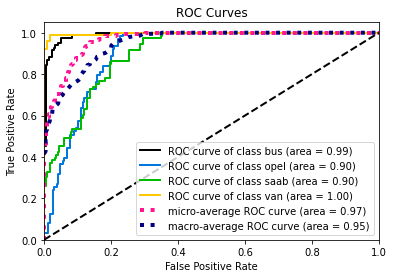

In [244]:
scikitplot.metrics.plot_roc(y_test, predicted_proba)

In [245]:
y_pred_f1 = best_f1_log_reg.predict(X_test_scaled)

In [246]:
y_pred_f1[:5]

array(['van', 'van', 'van', 'bus', 'opel'], dtype=object)

In [248]:
y_test[:5]

array(['van', 'van', 'van', 'bus', 'opel'], dtype=object)

In [249]:
f1_score(y_test, y_pred_f1, average='weighted')

0.7832310029103334

## Accuracy:

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
rnd_cv_acc = RandomizedSearchCV(log_reg, params_grid, cv=5, scoring='accuracy')

In [100]:
rnd_cv_acc.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=500,
                                                multi_class='multinomial',
                                                solver='saga', tol=0.001),
                   param_distributions=[{'C': [0.001, 1.0, 5.0],
                                         'n_jobs': [None, -1],
                                         'warm_start': [False, True]}],
                   scoring='accuracy')

In [101]:
rnd_cv_f1.best_params_

{'C': 5.0, 'n_jobs': None, 'warm_start': False}

In [102]:
rnd_cv_acc.best_params_

{'C': 5.0, 'n_jobs': None, 'warm_start': True}

In [103]:
best_acc_log_reg = rnd_cv_acc.best_estimator_

In [104]:
best_acc_log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=5.0, max_iter=500, multi_class='multinomial',
                   solver='saga', tol=0.001, warm_start=True)

In [105]:
y_pred_acc = best_acc_log_reg.predict(X_test_scaled)

In [106]:
accuracy_score(y_test, y_pred_acc)

0.7643097643097643

In [107]:
best_acc_log_reg.score(X_test_scaled, y_test)

0.7643097643097643

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [61]:
### YOUR CODE HERE

In [62]:
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,645,86,44,77,155,60,7,152,44,19,141,174,345,161,72,9,0,187,192
1,683,110,56,109,199,57,5,251,27,27,169,272,928,268,82,11,10,183,183
2,285,89,48,85,189,64,8,169,39,20,153,188,427,190,64,16,5,195,201
3,315,93,40,62,117,49,7,131,52,18,145,160,249,156,78,8,6,184,184
4,582,108,53,104,181,56,11,220,31,25,167,226,712,214,72,15,18,189,199


In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA()

In [65]:
pca.fit(X_train)

PCA()

In [66]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [67]:
len(cumsum)

19

In [68]:
cumsum

array([0.61781134, 0.98326865, 0.99096156, 0.99575323, 0.99728894,
       0.99807351, 0.99860033, 0.9990621 , 0.99936179, 0.99960168,
       0.99972934, 0.99982966, 0.9998908 , 0.99994235, 0.99997015,
       0.99998974, 0.99999665, 0.99999923, 1.        ])

Text(0, 0.5, 'Explained Variance')

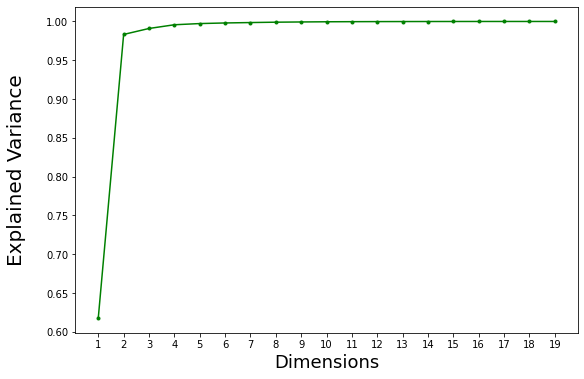

In [69]:
plt.figure(figsize=(9,6))
plt.plot(np.arange(1, 20), cumsum, 'g.-')
_ = plt.xticks(np.arange(1, 20))
plt.xlabel('Dimensions', fontsize=18)
plt.ylabel('Explained Variance', rotation=90, fontsize=20, labelpad=20)

In [70]:
d = np.argmax(cumsum >= 0.99) + 1

In [71]:
d

3

By projecting down to 4 dimensions, we lost about 0.8% of the variance:

In [72]:
1 - cumsum[d-1]

0.009038441349386805

## Let's see what we get with `X_scaled`

In [74]:
X_train_scaled[0]

array([ 0.92871669, -0.92483749, -0.1312835 , -0.30957623, -0.41364024,
       -0.21678646, -0.32300202, -0.51122747,  0.39036781, -0.61450346,
       -0.46281127, -0.47913942, -0.54406929, -0.40211752, -0.10232653,
        0.54006779, -1.39505428, -0.29368991, -0.46764143])

In [75]:
pca2 = PCA()

In [78]:
pca2.fit(X_train_scaled)

PCA()

In [79]:
cumsum2 = np.cumsum(pca2.explained_variance_ratio_)

In [80]:
cumsum

array([0.61781134, 0.98326865, 0.99096156, 0.99575323, 0.99728894,
       0.99807351, 0.99860033, 0.9990621 , 0.99936179, 0.99960168,
       0.99972934, 0.99982966, 0.9998908 , 0.99994235, 0.99997015,
       0.99998974, 0.99999665, 0.99999923, 1.        ])

In [81]:
cumsum2

array([0.49903183, 0.65225742, 0.76163876, 0.82059604, 0.87274224,
       0.92138807, 0.9476803 , 0.96454267, 0.97694191, 0.98499796,
       0.98944578, 0.99287399, 0.99543134, 0.99716604, 0.99823921,
       0.99905062, 0.99965543, 0.99998076, 1.        ])

Text(0, 0.5, 'Explained Variance')

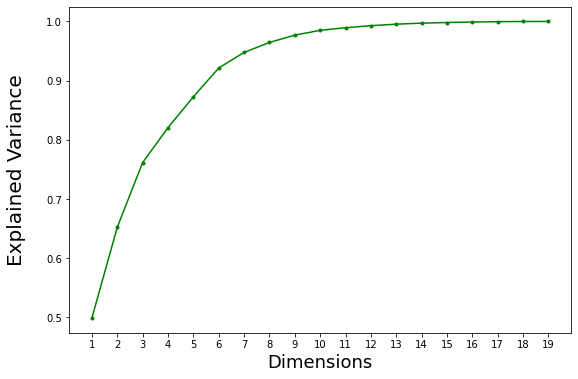

In [82]:
plt.figure(figsize=(9,6))
plt.plot(np.arange(1, 20), cumsum2, 'g.-')
_ = plt.xticks(np.arange(1, 20))
plt.xlabel('Dimensions', fontsize=18)
plt.ylabel('Explained Variance', rotation=90, fontsize=20, labelpad=20)

In [263]:
d2 = np.argmax(cumsum2 >= 0.99) + 1

NameError: name 'cumsum2' is not defined

In [84]:
d2

12

By projecting down to 12 dimensions, we lost about 0.7% of the variance:

In [85]:
1 - cumsum2[d2-1]

0.007126013047772717

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [86]:
### YOUR CODE HERE

In [87]:
pca_final = PCA(n_components=d2)

In [90]:
X_train_reduced = pca_final.fit_transform(X_train_scaled)

In [91]:
X_test_reduced = pca_final.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [92]:
### YOUR CODE HERE

In [93]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [95]:
params_grid = [
    {
        'C': [1e-3, 1.0, 5.0, 10.0, 15.0, 20.0],
        'warm_start': [False, True],
        'n_jobs': [None, -1],
        'max_iter': [500, 1e3, 5e3]
    }
]

In [96]:
from sklearn.metrics import f1_score, make_scorer

In [97]:
f1 = make_scorer(f1_score , average='weighted')

In [98]:
rnd_cv_f12 = RandomizedSearchCV(log_reg2, params_grid, cv=5, scoring=f1)

In [99]:
rnd_cv_f12.fit(X_train_reduced, y_train)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(multi_class='multinomial',
                                                solver='saga', tol=0.001),
                   param_distributions=[{'C': [0.001, 1.0, 5.0, 10.0, 15.0,
                                               20.0],
                                         'max_iter': [500, 1000.0, 5000.0],
                                         'n_jobs': [None, -1],
                                         'warm_start': [False, True]}],
                   scoring=make_scorer(f1_score, average=weighted))

In [100]:
rnd_cv_f12.best_params_

{'C': 20.0, 'max_iter': 500, 'n_jobs': -1, 'warm_start': True}

In [101]:
rnd_cv_f12.best_estimator_

LogisticRegression(C=20.0, max_iter=500, multi_class='multinomial', n_jobs=-1,
                   solver='saga', tol=0.001, warm_start=True)

In [102]:
best_f1_log_reg2 = rnd_cv_f12.best_estimator_

In [103]:
best_f1_log_reg2.fit(X_train_reduced, y_train)

LogisticRegression(C=20.0, max_iter=500, multi_class='multinomial', n_jobs=-1,
                   solver='saga', tol=0.001, warm_start=True)

In [104]:
predicted_proba2 = best_f1_log_reg2.predict_proba(X_test_reduced)

In [105]:
predicted_proba2.shape

(297, 4)

In [106]:
predicted_proba2

array([[1.31523915e-05, 7.93656589e-04, 1.68054115e-03, 9.97512650e-01],
       [9.96882455e-01, 1.42820283e-03, 1.63534371e-03, 5.39983530e-05],
       [5.38116730e-03, 3.36643700e-01, 6.52468474e-01, 5.50665796e-03],
       ...,
       [5.27995528e-05, 6.83318381e-04, 1.36613283e-03, 9.97897749e-01],
       [3.27028303e-04, 1.42363661e-03, 4.09300751e-03, 9.94156328e-01],
       [1.95144062e-03, 2.15473187e-02, 4.34273696e-02, 9.33073871e-01]])

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

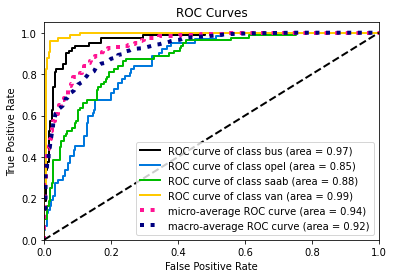

In [107]:
scikitplot.metrics.plot_roc(y_test, predicted_proba2)

In [108]:
y_pred_f12 = best_f1_log_reg2.predict(X_test_reduced)

In [109]:
f1_score(y_test, y_pred_f12, average='weighted')

0.7461961545664952

## Accuracy

In [110]:
rnd_cv_acc2 = RandomizedSearchCV(log_reg2, params_grid, cv=5, scoring='accuracy')

In [111]:
rnd_cv_acc2.fit(X_train_reduced, y_train)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(multi_class='multinomial',
                                                solver='saga', tol=0.001),
                   param_distributions=[{'C': [0.001, 1.0, 5.0, 10.0, 15.0,
                                               20.0],
                                         'max_iter': [500, 1000.0, 5000.0],
                                         'n_jobs': [None, -1],
                                         'warm_start': [False, True]}],
                   scoring='accuracy')

In [112]:
rnd_cv_f12.best_params_

{'C': 20.0, 'max_iter': 500, 'n_jobs': -1, 'warm_start': True}

In [113]:
rnd_cv_acc2.best_params_

{'C': 5.0, 'max_iter': 500, 'n_jobs': -1, 'warm_start': True}

In [114]:
best_acc_log_reg2 = rnd_cv_acc2.best_estimator_

In [115]:
best_acc_log_reg2.fit(X_train_reduced, y_train)

LogisticRegression(C=5.0, max_iter=500, multi_class='multinomial', n_jobs=-1,
                   solver='saga', tol=0.001, warm_start=True)

In [117]:
y_pred_acc2 = best_acc_log_reg2.predict(X_test_reduced)

In [118]:
accuracy_score(y_test, y_pred_acc2)

0.7474747474747475

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [120]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

In [121]:
tree_clf = DecisionTreeClassifier()

In [122]:
params_tree = [
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': np.arange(2, 10),
        'max_features': np.arange(2, 10)
    }
]

In [123]:
f1 = make_scorer(f1_score , average='weighted')

In [125]:
rnd_cv_tree = RandomizedSearchCV(tree_clf, params_tree, cv=5, scoring=f1)

In [126]:
rnd_cv_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                         'max_features': array([2, 3, 4, 5, 6, 7, 8, 9])}],
                   scoring=make_scorer(f1_score, average=weighted))

In [127]:
rnd_cv_tree.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 8}

In [128]:
best_tree = rnd_cv_tree.best_estimator_

In [129]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=8)

In [130]:
y_pred_f1_tree = best_tree.predict(X_test)

In [131]:
f1_score(y_test, y_pred_f1_tree, average='weighted')

0.6718248276131703

In [132]:
best_tree.fit(X_train_reduced, y_train)

DecisionTreeClassifier(max_depth=6, max_features=8)

In [133]:
y_pred_f1_tree = best_tree.predict(X_test_reduced)

In [134]:
f1_score(y_test, y_pred_f1_tree, average='weighted')

0.686203360879399

## Accuracy

In [135]:
rnd_cv_tree_acc = RandomizedSearchCV(tree_clf, params_tree, cv=5, scoring='accuracy')

In [136]:
rnd_cv_tree_acc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                         'max_features': array([2, 3, 4, 5, 6, 7, 8, 9])}],
                   scoring='accuracy')

In [156]:
rnd_cv_tree.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 8}

In [137]:
best_tree_acc = rnd_cv_tree.best_estimator_

In [138]:
best_tree_acc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=8)

In [139]:
y_pred_acc_tree = best_tree_acc.predict(X_test)

In [140]:
accuracy_score(y_test, y_pred_acc_tree)

0.6936026936026936

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

In [269]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [310]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=, bootstrap=True, max_samples=1.0, warm_start=False, random_state=42, oob_score=True)

In [311]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),
                  n_estimators=80, oob_score=True, random_state=42)

In [312]:
bag_clf.base_estimator_

DecisionTreeClassifier(max_depth=6)

In [313]:
bag_clf.oob_score_

0.7194899817850637

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [264]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE